In [107]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [111]:
# Charger les fichiers CSV pour l'exploration des participants et des ROIs

train_participants = pd.read_csv(r'C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Machine Learning\brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024\data\train_participants.csv')
test_participants = pd.read_csv(r'C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Machine Learning\brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024\data\test_participants.csv')

train_rois = pd.read_csv(r'C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Machine Learning\brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024\data\train_rois.csv')
test_rois = pd.read_csv(r'C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Machine Learning\brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024\data\test_rois.csv')

In [123]:
train_participants.head().to_csv("train_participants_head.csv",sep=";", index=False)
train_rois.head().to_csv("train_rois_head.csv", sep=";",index=False)

In [115]:
print(train_rois.columns.shape)
print(train_participants.shape)

(291,)
(410, 11)


In [133]:
merged_df = pd.merge(train_participants, train_rois)

In [135]:
merged_df.to_csv("merged_df.csv", sep=";",index=False)

In [74]:

# Examiner les données des CSV
train_participants_overview = train_participants.head()
test_participants_overview = test_participants.head()
train_participants_overview

,participant_id,session,sex,age,diagnosis,study,site,TIV,CSF_Vol,GM_Vol,WM_Vol
0,CH7098a,V1,0.0,20.0,schizophrenia,SCHIZCONNECT-VIP,NU,1712.357084,375.529152,747.089338,586.391159
1,A00024535,V1,0.0,26.0,control,SCHIZCONNECT-VIP,MRN,1700.601735,399.493745,721.128411,579.446172
2,CC7563,V1,1.0,28.0,control,SCHIZCONNECT-VIP,WUSTL,1449.327365,220.825294,661.028439,566.500051
3,CC3945,V1,1.0,21.0,control,SCHIZCONNECT-VIP,WUSTL,1184.699000,201.579922,560.051329,423.016129
4,CH8853b,V1,1.0,21.0,control,SCHIZCONNECT-VIP,NU,1518.198466,291.544632,705.384606,520.807601


In [75]:
train_rois_overview = train_rois.describe()
test_rois_overview = test_rois.describe()
train_rois_overview

,run,TIV,CSF_Vol,GM_Vol,WM_Vol,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,...,lSupParLo_CSF_Vol,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol
count,410.0,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,1.0,1426.838006,284.925073,625.844300,515.021569,0.068188,0.054960,0.060159,0.063471,0.443885,...,5.769952,5.825811,1.908472,2.323194,4.189568,4.524707,1.415476,1.424886,0.281325,0.279465
std,0.0,151.554651,71.145473,74.888798,64.142373,0.021501,0.014046,0.010842,0.011907,0.062384,...,1.677309,1.761455,0.571756,0.598149,1.263884,1.198689,0.415769,0.392271,0.124259,0.110577
min,1.0,1071.499793,144.985388,428.563675,365.082239,0.026151,0.019970,0.035449,0.038116,0.278686,...,2.434086,2.343344,0.666104,0.925935,1.713793,1.937265,0.444807,0.657370,0.070825,0.068818
25%,1.0,1326.859179,230.153254,570.111862,472.678247,0.052937,0.045358,0.052899,0.054813,0.397846,...,4.536518,4.538314,1.486688,1.912390,3.174184,3.635990,1.100095,1.128659,0.190402,0.201450
50%,1.0,1418.188807,276.078037,622.347001,508.949562,0.064398,0.053194,0.058563,0.061305,0.441845,...,5.570530,5.554689,1.875150,2.294370,4.025328,4.330254,1.374814,1.389585,0.262871,0.257336
75%,1.0,1531.112130,325.382134,679.384591,559.481362,0.079600,0.062851,0.065550,0.069286,0.485649,...,6.860631,6.845818,2.269122,2.675258,4.957428,5.269713,1.662880,1.683179,0.346478,0.348507
max,1.0,1852.574833,570.503425,889.396408,741.492388,0.140896,0.106456,0.105759,0.118038,0.630506,...,11.070928,10.752836,4.269030,5.033381,8.360051,9.017830,2.794183,2.769662,0.951132,0.679091


In [76]:
# Obtenir des informations de base
print("Aperçu des premières lignes :")
print(train_rois.head())

print("\nStatistiques descriptives :")
print(train_rois.describe())

print("\nInformations sur les colonnes :")
print(train_rois.info())


Aperçu des premières lignes :
  participant_id session  run          TIV     CSF_Vol      GM_Vol  \
0        CH7098a      V1    1  1712.357084  375.529152  747.089338   
1      A00024535      V1    1  1700.601735  399.493745  721.128411   
2         CC7563      V1    1  1449.327365  220.825294  661.028439   
3         CC3945      V1    1  1184.699000  201.579922  560.051329   
4        CH8853b      V1    1  1518.198466  291.544632  705.384606   

       WM_Vol  l3thVen_GM_Vol  r3thVen_GM_Vol  l4thVen_GM_Vol  ...  \
0  586.391159        0.063950        0.058779        0.062019  ...   
1  579.446172        0.047534        0.044989        0.053391  ...   
2  566.500051        0.118209        0.088380        0.069014  ...   
3  423.016129        0.102882        0.084044        0.044932  ...   
4  520.807601        0.067550        0.065347        0.047114  ...   

   lSupParLo_CSF_Vol  rSupParLo_CSF_Vol  lSupTemGy_CSF_Vol  rSupTemGy_CSF_Vol  \
0           7.488130           8.622047        

In [77]:
# # Sauvegarder les résultats dans des fichiers texte
# with open("train_rois_head.txt", "w") as f:
#     f.write("Aperçu des premières lignes :\n")
#     f.write(train_rois.head().to_string())

# with open("train_rois_describe.txt", "w") as f:
#     f.write("Statistiques descriptives :\n")
#     f.write(train_rois.describe().to_string())

# with open("train_rois_info.txt", "w") as f:
#     f.write("Informations sur les colonnes :\n")
#     f.write(str(train_rois.info()))  # La méthode info() imprime directement, donc str() est utilisé ici

### EDA de ROIs

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

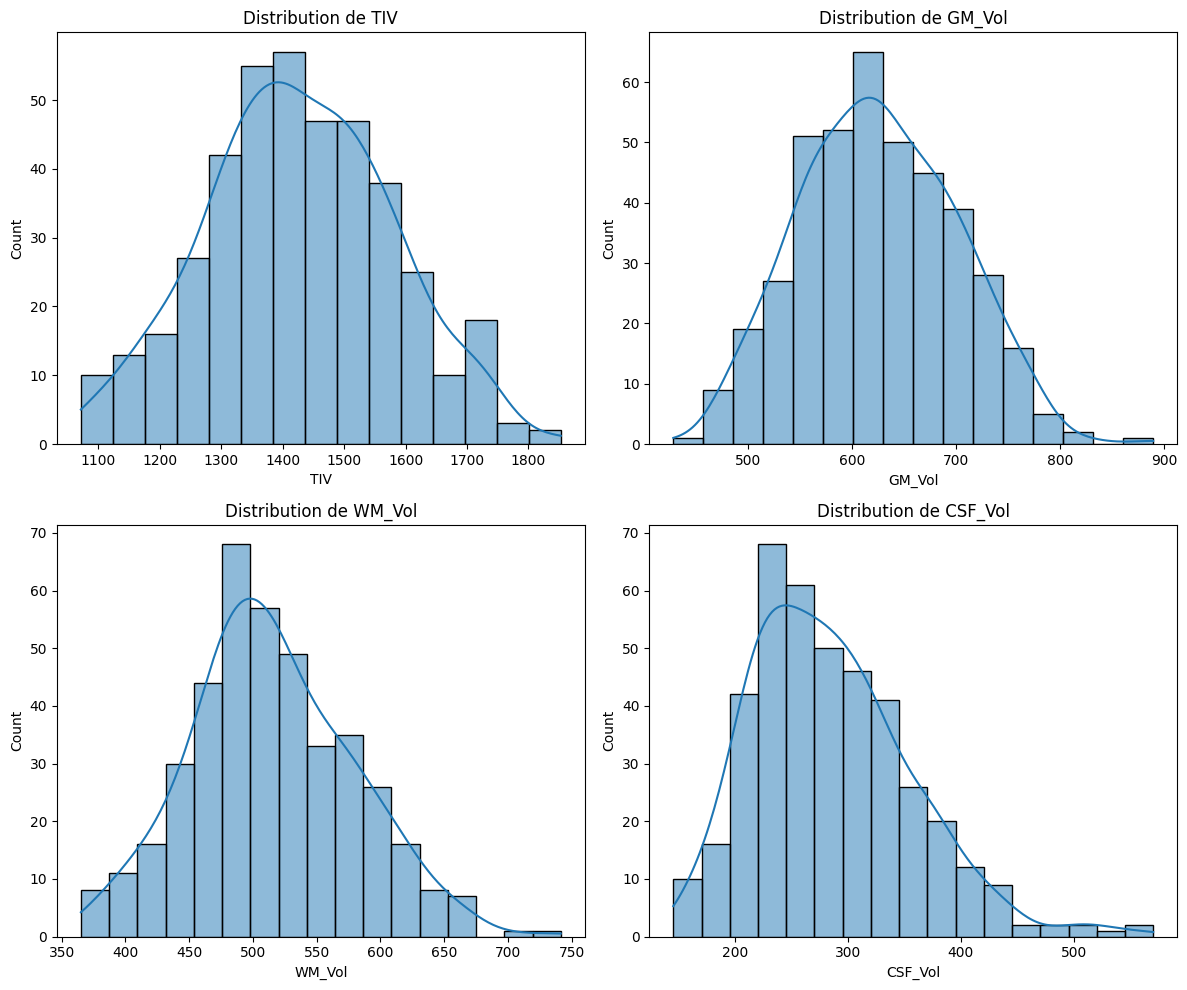

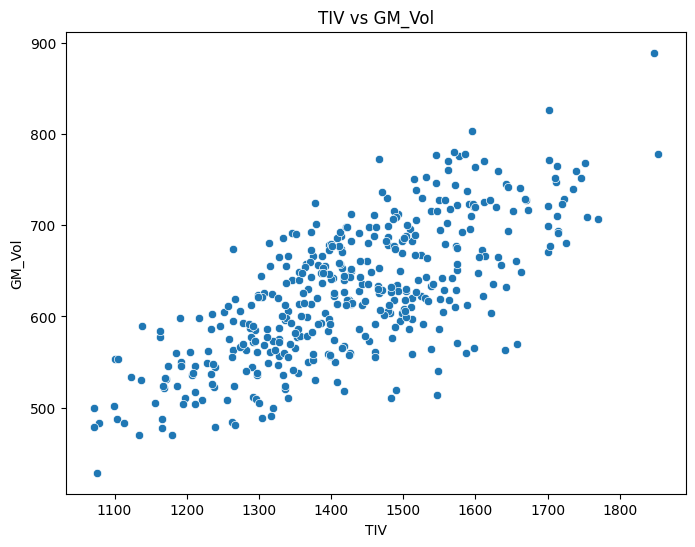

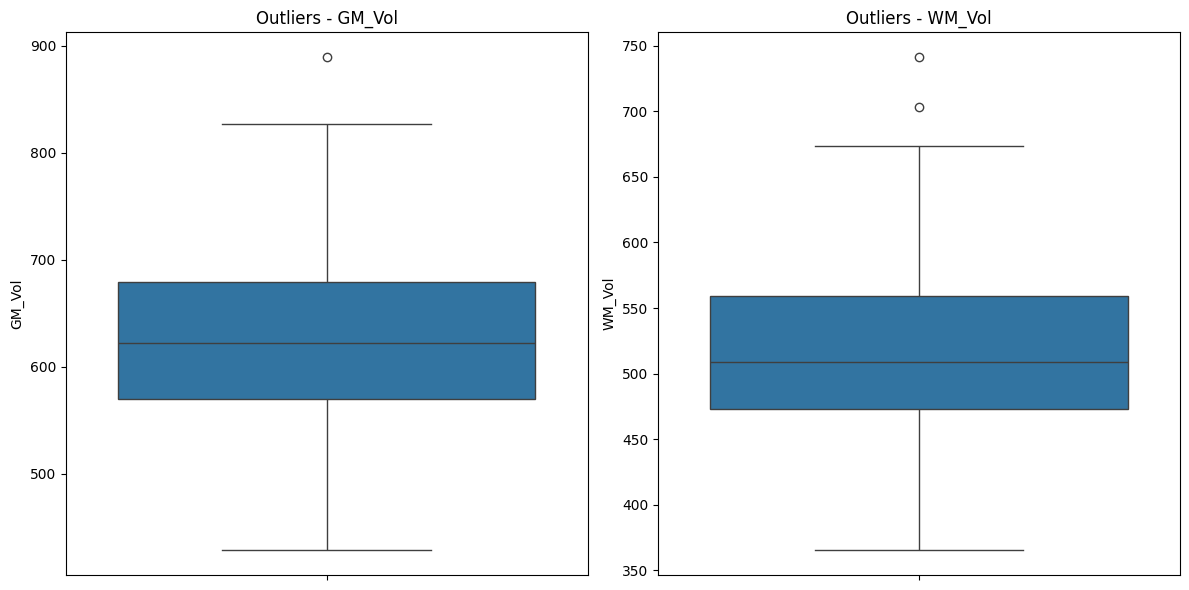

In [79]:
missing_values = train_rois.isnull().sum()

# Statistiques descriptives
stats = train_rois.describe()

# Distribution des variables principales
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(train_rois['TIV'], kde=True, ax=axs[0, 0]).set_title('Distribution de TIV')
sns.histplot(train_rois['GM_Vol'], kde=True, ax=axs[0, 1]).set_title('Distribution de GM_Vol')
sns.histplot(train_rois['WM_Vol'], kde=True, ax=axs[1, 0]).set_title('Distribution de WM_Vol')
sns.histplot(train_rois['CSF_Vol'], kde=True, ax=axs[1, 1]).set_title('Distribution de CSF_Vol')
plt.tight_layout()

# Corrélation entre TIV et GM_Vol
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_rois['TIV'], y=train_rois['GM_Vol']).set_title('TIV vs GM_Vol')

# Analyse des outliers avec boxplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=train_rois['GM_Vol'], ax=axs[0]).set_title('Outliers - GM_Vol')
sns.boxplot(y=train_rois['WM_Vol'], ax=axs[1]).set_title('Outliers - WM_Vol')
plt.tight_layout()

# Sauvegarder les résultats
missing_values.to_csv("missing_values.csv", index=True)
stats.to_csv("stats.csv")


In [80]:
"""
Corrélation entre TIV et GM_Vol (Graphique TIV vs GM_Vol)
Observation : Il existe une corrélation linéaire claire entre TIV (Volume intracrânien total) et GM_Vol (Volume de matière grise).
Interprétation :
Cela montre que les individus ayant un volume intracrânien total plus élevé tendent à avoir un volume de matière grise plus important.
Cette relation est attendue, car TIV est une mesure globale influençant les volumes régionaux.
Recommandation :
Inclure TIV comme variable de contrôle ou standardiser les volumes cérébraux (par exemple, diviser GM_Vol par TIV) pour les analyses futures.
"""

'\nCorrélation entre TIV et GM_Vol (Graphique TIV vs GM_Vol)\nObservation : Il existe une corrélation linéaire claire entre TIV (Volume intracrânien total) et GM_Vol (Volume de matière grise).\nInterprétation :\nCela montre que les individus ayant un volume intracrânien total plus élevé tendent à avoir un volume de matière grise plus important.\nCette relation est attendue, car TIV est une mesure globale influençant les volumes régionaux.\nRecommandation :\nInclure TIV comme variable de contrôle ou standardiser les volumes cérébraux (par exemple, diviser GM_Vol par TIV) pour les analyses futures.\n'

In [81]:
""" 
2. Distribution des variables principales (Histogrammes)
Observation :
Les distributions de TIV, GM_Vol, WM_Vol (matière blanche), et CSF_Vol (liquide céphalorachidien) montrent des formes normales ou quasi-normales.
Les histogrammes montrent une population relativement homogène, sans bimodalité apparente.
Interprétation :
Une distribution normale facilite l'application de modèles linéaires pour prédire les volumes.
Les distributions sont cohérentes avec une population saine, mais il faudra comparer avec des patients atteints de schizophrénie pour détecter des anomalies.
Recommandation :
Vérifier la normalité statistiquement (tests de Shapiro-Wilk ou Kolmogorov-Smirnov) pour confirmer les hypothèses de normalité.
"""

" \n2. Distribution des variables principales (Histogrammes)\nObservation :\nLes distributions de TIV, GM_Vol, WM_Vol (matière blanche), et CSF_Vol (liquide céphalorachidien) montrent des formes normales ou quasi-normales.\nLes histogrammes montrent une population relativement homogène, sans bimodalité apparente.\nInterprétation :\nUne distribution normale facilite l'application de modèles linéaires pour prédire les volumes.\nLes distributions sont cohérentes avec une population saine, mais il faudra comparer avec des patients atteints de schizophrénie pour détecter des anomalies.\nRecommandation :\nVérifier la normalité statistiquement (tests de Shapiro-Wilk ou Kolmogorov-Smirnov) pour confirmer les hypothèses de normalité.\n"

In [82]:
"""
3. Outliers détectés (Boxplots pour GM_Vol et WM_Vol)
Observation :
Quelques outliers sont présents pour GM_Vol et WM_Vol, avec des valeurs extrêmes au-dessus de la plage normale.
Interprétation :
Ces outliers pourraient représenter des anomalies biologiques ou des erreurs de mesure.
Recommandation :
Explorer ces outliers individuellement en croisant les données cliniques.
Décider de les exclure ou de les conserver en fonction de leur pertinence biologique.
"""

'\n3. Outliers détectés (Boxplots pour GM_Vol et WM_Vol)\nObservation :\nQuelques outliers sont présents pour GM_Vol et WM_Vol, avec des valeurs extrêmes au-dessus de la plage normale.\nInterprétation :\nCes outliers pourraient représenter des anomalies biologiques ou des erreurs de mesure.\nRecommandation :\nExplorer ces outliers individuellement en croisant les données cliniques.\nDécider de les exclure ou de les conserver en fonction de leur pertinence biologique.\n'

### EDA de ROIs * Participants

Colonnes communes : {'TIV', 'CSF_Vol', 'participant_id', 'GM_Vol', 'session', 'WM_Vol'}


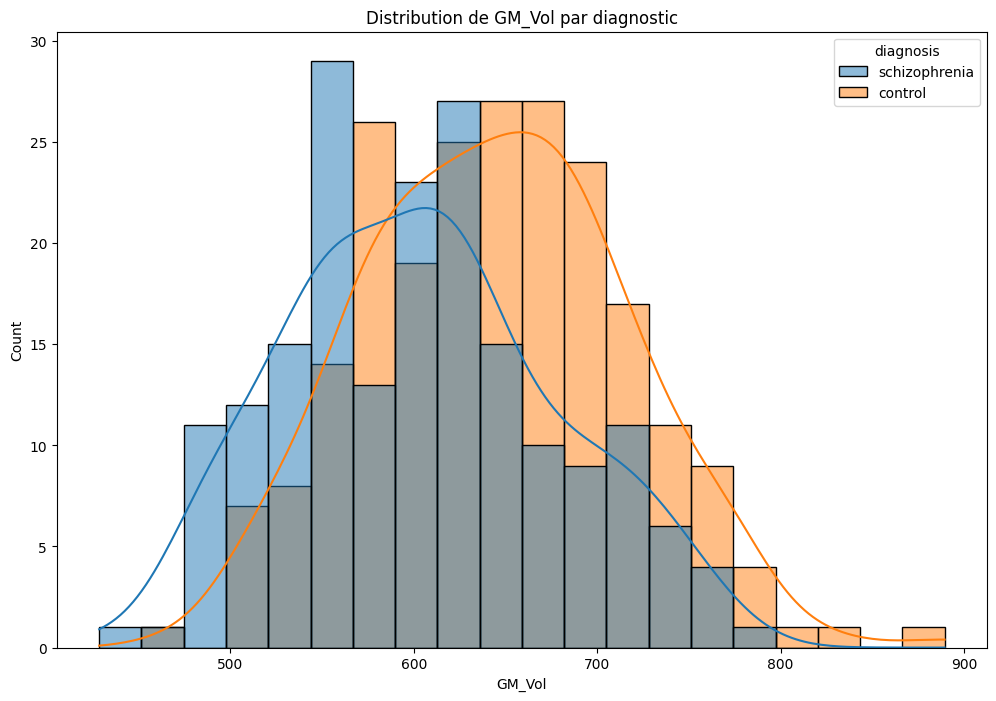

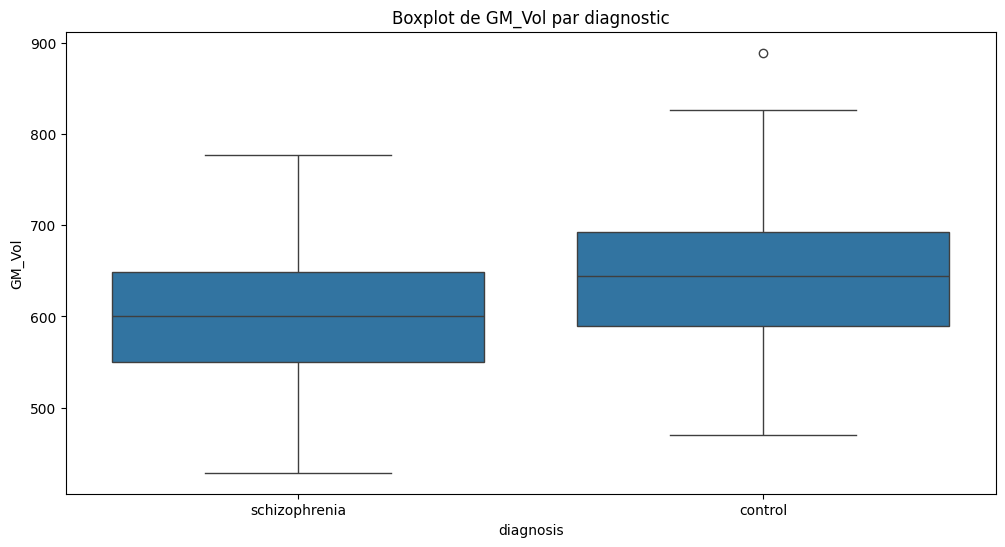

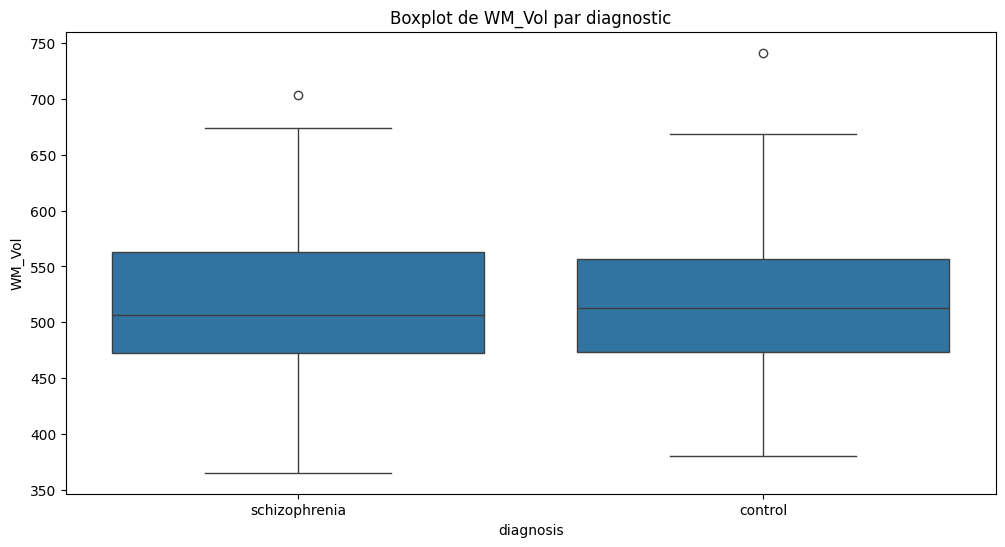

In [83]:
common_columns = set(train_participants.columns).intersection(set(train_rois.columns))
print(f"Colonnes communes : {common_columns}")

# Exclure les colonnes communes des ROIs, sauf 'participant_id'
columns_to_merge = [col for col in train_rois.columns if col not in common_columns or col == "participant_id"]

# Effectuer le merge en excluant les doublons
merged_data = pd.merge(train_participants, train_rois[columns_to_merge], on="participant_id")

# Sauvegarder les données fusionnées dans un fichier CSV
merged_data.to_csv("merged_data.csv", index=False)

# Distribution des volumes par variable cible 'diagnosis'
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_data, x="GM_Vol", hue="diagnosis", kde=True, bins=20).set_title("Distribution de GM_Vol par diagnostic")
plt.savefig("GM_Vol_diagnosis_distribution.png")
plt.show()

# Statistiques descriptives par groupe cible 'diagnosis'
stats_by_diagnosis = merged_data.groupby("diagnosis").describe()
stats_by_diagnosis.to_csv("stats_by_diagnosis.csv")

# Boxplots pour comparer les groupes par 'diagnosis'
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x="diagnosis", y="GM_Vol").set_title("Boxplot de GM_Vol par diagnostic")
plt.savefig("Boxplot_GM_Vol_diagnosis.png")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x="diagnosis", y="WM_Vol").set_title("Boxplot de WM_Vol par diagnostic")
plt.savefig("Boxplot_WM_Vol_diagnosis.png")
plt.show()

In [84]:
"""
1. Boxplot de GM_Vol par diagnostic
Observation :
Les patients contrôles (control) semblent avoir des volumes de matière grise (GM_Vol) globalement plus élevés que ceux atteints de schizophrénie (schizophrenia).
Une légère différence dans la médiane est visible, et quelques outliers apparaissent dans les deux groupes.
Interprétation :
Cela pourrait refléter une perte de matière grise associée à la schizophrénie, comme observé dans de nombreuses études cliniques.
Prochaine étape :
Tester statistiquement cette différence (e.g., t-test ou test U de Mann-Whitney).
"""

'\n1. Boxplot de GM_Vol par diagnostic\nObservation :\nLes patients contrôles (control) semblent avoir des volumes de matière grise (GM_Vol) globalement plus élevés que ceux atteints de schizophrénie (schizophrenia).\nUne légère différence dans la médiane est visible, et quelques outliers apparaissent dans les deux groupes.\nInterprétation :\nCela pourrait refléter une perte de matière grise associée à la schizophrénie, comme observé dans de nombreuses études cliniques.\nProchaine étape :\nTester statistiquement cette différence (e.g., t-test ou test U de Mann-Whitney).\n'

In [85]:
"""
2. Boxplot de WM_Vol par diagnostic
Observation :
Les volumes de matière blanche (WM_Vol) ne montrent pas de différence marquée entre les deux groupes.
Les distributions semblent similaires, bien que des outliers soient présents.
Interprétation :
La matière blanche pourrait ne pas être aussi affectée que la matière grise dans ce contexte. Cependant, des analyses supplémentaires sur des sous-régions spécifiques pourraient être utiles.

"""

'\n2. Boxplot de WM_Vol par diagnostic\nObservation :\nLes volumes de matière blanche (WM_Vol) ne montrent pas de différence marquée entre les deux groupes.\nLes distributions semblent similaires, bien que des outliers soient présents.\nInterprétation :\nLa matière blanche pourrait ne pas être aussi affectée que la matière grise dans ce contexte. Cependant, des analyses supplémentaires sur des sous-régions spécifiques pourraient être utiles.\n\n'

In [86]:
"""
3. Distribution de GM_Vol par diagnostic
Observation :
Les distributions des contrôles et des patients atteints de schizophrénie se chevauchent, mais les contrôles présentent une légère tendance vers des volumes plus élevés.
Les distributions sont presque normales pour les deux groupes.
Interprétation :
Bien que les distributions se chevauchent, la moyenne plus élevée pour les contrôles peut indiquer un effet significatif.
"""

'\n3. Distribution de GM_Vol par diagnostic\nObservation :\nLes distributions des contrôles et des patients atteints de schizophrénie se chevauchent, mais les contrôles présentent une légère tendance vers des volumes plus élevés.\nLes distributions sont presque normales pour les deux groupes.\nInterprétation :\nBien que les distributions se chevauchent, la moyenne plus élevée pour les contrôles peut indiquer un effet significatif.\n'

In [87]:
"""
Analyse du fichier stats_by_diagnosis.csv
Statistiques descriptives par groupe :
Les moyennes et écarts-types des volumes montrent des différences notables pour GM_Vol entre les groupes.
Les variations pour WM_Vol sont moins prononcées.
"""

'\nAnalyse du fichier stats_by_diagnosis.csv\nStatistiques descriptives par groupe :\nLes moyennes et écarts-types des volumes montrent des différences notables pour GM_Vol entre les groupes.\nLes variations pour WM_Vol sont moins prononcées.\n'

1. Test statistique pour GM_Vol et WM_Vol


In [88]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

In [89]:
control_group = merged_data[merged_data['diagnosis'] == "control"]
schizophrenia_group = merged_data[merged_data['diagnosis'] == "schizophrenia"]

# T-test pour GM_Vol
t_stat_gm, p_value_gm = ttest_ind(control_group['GM_Vol'], schizophrenia_group['GM_Vol'], equal_var=False)
print(f"T-test GM_Vol: t-statistic={t_stat_gm:.3f}, p-value={p_value_gm:.3f}")

# T-test pour WM_Vol
t_stat_wm, p_value_wm = ttest_ind(control_group['WM_Vol'], schizophrenia_group['WM_Vol'], equal_var=False)
print(f"T-test WM_Vol: t-statistic={t_stat_wm:.3f}, p-value={p_value_wm:.3f}")

# Test U de Mann-Whitney pour GM_Vol
u_stat_gm, p_value_u_gm = mannwhitneyu(control_group['GM_Vol'], schizophrenia_group['GM_Vol'])
print(f"Mann-Whitney U GM_Vol: u-statistic={u_stat_gm:.3f}, p-value={p_value_u_gm:.3f}")

# Test U de Mann-Whitney pour WM_Vol
u_stat_wm, p_value_u_wm = mannwhitneyu(control_group['WM_Vol'], schizophrenia_group['WM_Vol'])
print(f"Mann-Whitney U WM_Vol: u-statistic={u_stat_wm:.3f}, p-value={p_value_u_wm:.3f}")

T-test GM_Vol: t-statistic=5.845, p-value=0.000
T-test WM_Vol: t-statistic=0.560, p-value=0.576
Mann-Whitney U GM_Vol: u-statistic=27466.000, p-value=0.000
Mann-Whitney U WM_Vol: u-statistic=21547.000, p-value=0.570


In [90]:
"""
GM_Vol :
T-test : t-statistic = 5.845, p-value = 0.000.
Interprétation : La différence moyenne entre les volumes de matière grise (GM_Vol) des groupes schizophrenia et control est statistiquement significative (p < 0.05).
Cela corrobore l'idée que la schizophrénie est associée à des changements dans la matière grise.
"""

"\nGM_Vol :\nT-test : t-statistic = 5.845, p-value = 0.000.\nInterprétation : La différence moyenne entre les volumes de matière grise (GM_Vol) des groupes schizophrenia et control est statistiquement significative (p < 0.05).\nCela corrobore l'idée que la schizophrénie est associée à des changements dans la matière grise.\n"

In [91]:
"""
Mann-Whitney U : u-statistic = 27466.000, p-value = 0.000.
Le test non paramétrique confirme que les groupes ont des distributions significativement différentes pour GM_Vol.
"""

'\nMann-Whitney U : u-statistic = 27466.000, p-value = 0.000.\nLe test non paramétrique confirme que les groupes ont des distributions significativement différentes pour GM_Vol.\n'

In [92]:
"""
WM_Vol :
T-test : t-statistic = 0.560, p-value = 0.576.
Interprétation : Aucune différence statistiquement significative pour les volumes de matière blanche (WM_Vol) entre les groupes.
Mann-Whitney U : u-statistic = 21547.000, p-value = 0.570.
Le test non paramétrique confirme cette absence de différence.
"""

'\nWM_Vol :\nT-test : t-statistic = 0.560, p-value = 0.576.\nInterprétation : Aucune différence statistiquement significative pour les volumes de matière blanche (WM_Vol) entre les groupes.\nMann-Whitney U : u-statistic = 21547.000, p-value = 0.570.\nLe test non paramétrique confirme cette absence de différence.\n'

Conclusion : La matière grise est significativement affectée chez les patients atteints de schizophrénie, tandis que la matière blanche semble inchangée.

2. Analyse multivariée avec PCA


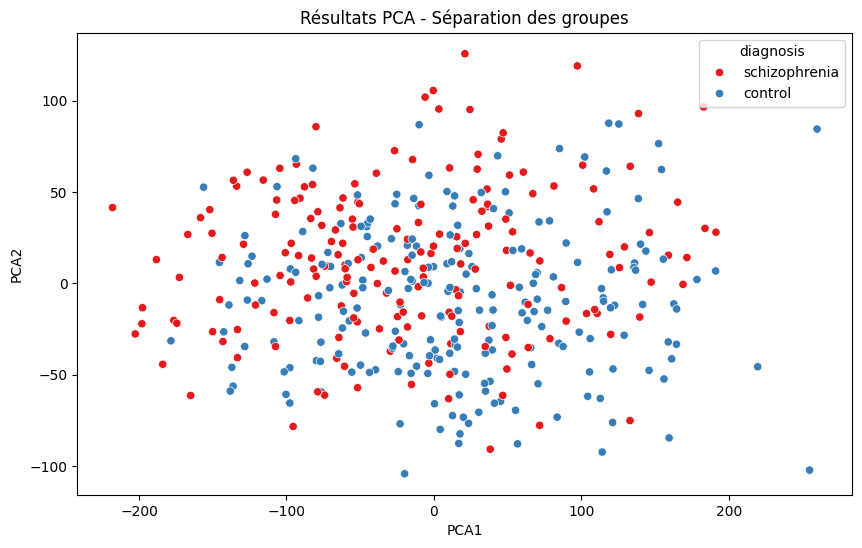

In [93]:
from sklearn.decomposition import PCA

features = ['GM_Vol', 'WM_Vol']
X = merged_data[features]

# Réduction des dimensions avec PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Ajouter les résultats PCA aux données
merged_data['PCA1'] = pca_result[:, 0]
merged_data['PCA2'] = pca_result[:, 1]

# Visualiser les résultats de la PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="diagnosis", data=merged_data, palette="Set1")
plt.title("Résultats PCA - Séparation des groupes")
plt.show()

In [94]:
"""
Graphique PCA :
Les deux groupes (schizophrenia et control) montrent un chevauchement significatif dans l'espace des deux premières composantes principales.
Interprétation : La séparation entre les groupes n'est pas nette, ce qui indique que GM_Vol et WM_Vol seuls ne suffisent pas pour discriminer parfaitement les groupes.
"""

"\nGraphique PCA :\nLes deux groupes (schizophrenia et control) montrent un chevauchement significatif dans l'espace des deux premières composantes principales.\nInterprétation : La séparation entre les groupes n'est pas nette, ce qui indique que GM_Vol et WM_Vol seuls ne suffisent pas pour discriminer parfaitement les groupes.\n"

3. Modélisation avec un modèle de classification


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Préparer les données pour la modélisation
X = merged_data[['GM_Vol', 'WM_Vol']]
y = merged_data['diagnosis'].map({"control": 0, "schizophrenia": 1})  # Encoder la cible en 0 et 1

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        50
           1       0.49      0.59      0.54        32

    accuracy                           0.60        82
   macro avg       0.59      0.60      0.59        82
weighted avg       0.62      0.60      0.60        82

Matrice de confusion :
[[30 20]
 [13 19]]


In [96]:
"""
Le modèle Random Forest fonctionne, mais il est limité par les variables disponibles.
"""

'\nLe modèle Random Forest fonctionne, mais il est limité par les variables disponibles.\n'

Étape 1 : Création de nouvelles features

In [97]:
merged_data = pd.merge(train_participants, train_rois[columns_to_merge], on="participant_id")

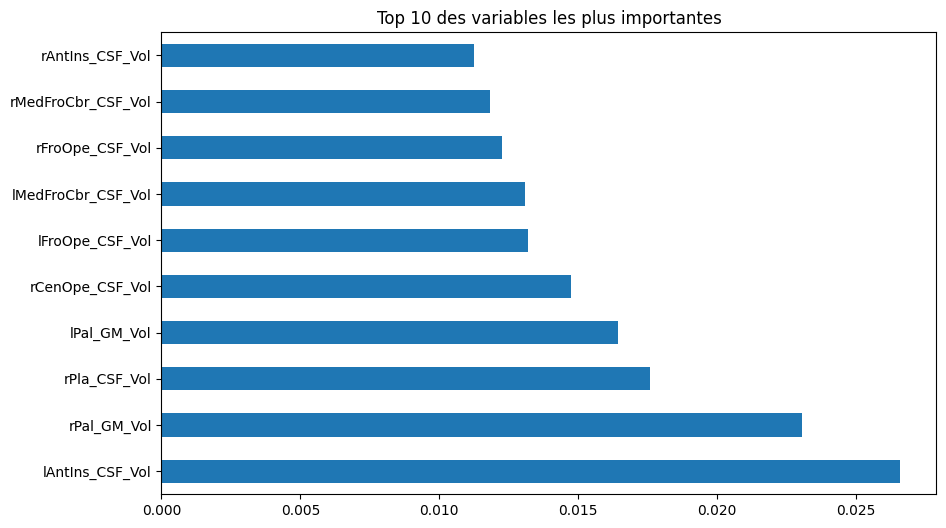

Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        50
           1       0.63      0.81      0.71        32

    accuracy                           0.74        82
   macro avg       0.74      0.76      0.74        82
weighted avg       0.77      0.74      0.75        82

Matrice de confusion :
[[35 15]
 [ 6 26]]


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Charger les données fusionnées
merged_data = pd.read_csv("merged_data.csv")

# Ajouter des ratios normalisés
merged_data['GM_TIV_Ratio'] = merged_data['GM_Vol'] / merged_data['TIV']
merged_data['WM_TIV_Ratio'] = merged_data['WM_Vol'] / merged_data['TIV']
merged_data['CSF_TIV_Ratio'] = merged_data['CSF_Vol'] / merged_data['TIV']

# Ajouter des interactions entre volumes
merged_data['GM_WM_Ratio'] = merged_data['GM_Vol'] / merged_data['WM_Vol']
merged_data['GM_CSF_Ratio'] = merged_data['GM_Vol'] / merged_data['CSF_Vol']

# Filtrer uniquement les colonnes numériques pertinentes
columns_to_drop = ['TIV', 'GM_Vol', 'WM_Vol', 'CSF_Vol']  # Colonnes à exclure
columns_to_drop = [col for col in columns_to_drop if col in merged_data.columns]  # Vérifier leur existence
X = merged_data.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_drop)

# Encoder la variable cible
y = merged_data['diagnosis'].map({'control': 0, 'schizophrenia': 1})  # Correction ici

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Importance des features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)

# Visualisation des features les plus importantes
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 10 des variables les plus importantes")
plt.show()

# Évaluation des performances
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


In [100]:
"""
Top 10 des variables les plus importantes :
Les variables les plus importantes pour le modèle incluent :
lAntIns_CSF_Vol (volume de liquide céphalo-rachidien dans la partie antérieure de l'insula gauche).
rPal_GM_Vol (volume de matière grise dans le paléocortex droit).
Plusieurs autres volumes régionaux liés à la matière grise et au liquide céphalo-rachidien.
Interprétation :
Ces régions et volumes sont fortement corrélés avec la distinction entre control et schizophrenia.
Les volumes de liquide céphalo-rachidien (CSF) semblent jouer un rôle important, ce qui est conforme à certaines études indiquant une dilatation ventriculaire et des changements CSF dans la schizophrénie.
"""

"\nTop 10 des variables les plus importantes :\nLes variables les plus importantes pour le modèle incluent :\nlAntIns_CSF_Vol (volume de liquide céphalo-rachidien dans la partie antérieure de l'insula gauche).\nrPal_GM_Vol (volume de matière grise dans le paléocortex droit).\nPlusieurs autres volumes régionaux liés à la matière grise et au liquide céphalo-rachidien.\nInterprétation :\nCes régions et volumes sont fortement corrélés avec la distinction entre control et schizophrenia.\nLes volumes de liquide céphalo-rachidien (CSF) semblent jouer un rôle important, ce qui est conforme à certaines études indiquant une dilatation ventriculaire et des changements CSF dans la schizophrénie.\n"

In [101]:
"""
Rapport de classification :
Précision globale : 74%.
Pour le groupe control (0) :
Précision : 85%.
Rappel : 70%.
Cela signifie que le modèle est très bon pour prédire les contrôles, mais qu'il manque certains contrôles.
Pour le groupe schizophrenia (1) :
Précision : 63%.
Rappel : 81%.
Le modèle détecte bien les schizophrénies (rappel élevé), mais confond encore certains cas avec des contrôles.
F1-score : Moyenne équilibrée des performances pour les deux classes.

"""

"\nRapport de classification :\nPrécision globale : 74%.\nPour le groupe control (0) :\nPrécision : 85%.\nRappel : 70%.\nCela signifie que le modèle est très bon pour prédire les contrôles, mais qu'il manque certains contrôles.\nPour le groupe schizophrenia (1) :\nPrécision : 63%.\nRappel : 81%.\nLe modèle détecte bien les schizophrénies (rappel élevé), mais confond encore certains cas avec des contrôles.\nF1-score : Moyenne équilibrée des performances pour les deux classes.\n\n"

In [102]:
merged_data = pd.read_csv("merged_data.csv")


### Analyse d'articles medicaux

Région cérébrale	Tendance du volume
Cortex préfrontal	    Diminution
Lobes temporaux	        Diminution
Thalamus	            Diminution
Ventricules cérébraux	Augmentation
Cervelet	            Diminution
Hippocampe	            Diminution
Matière blanche	        Anomalies détectées
Cortex pariétal	        Diminution
Cortex occipital	    Diminution (moins fréquent)
Amygdale	            Anomalies structurelles

In [ ]:
1. Cortex préfrontal : Plusieurs études indiquent une diminution du volume de la matière grise dans le cortex préfrontal chez les patients schizophrènes. Cette réduction est associée à des déficits cognitifs et à des symptômes négatifs de la maladie. 

2. Lobes temporaux : Les lobes temporaux, en particulier les régions impliquées dans la mémoire et le traitement auditif, présentent également une réduction de volume. Ces changements sont liés à des hallucinations auditives et à des troubles de la mémoire. 

3. Thalamus : Des anomalies de volume et de forme du thalamus ont été observées, suggérant une diminution de sa taille. Le thalamus joue un rôle crucial dans la transmission des informations sensorielles et son altération peut contribuer aux symptômes de la schizophrénie.

4. Ventricules cérébraux : Une augmentation du volume des ventricules latéraux et du troisième ventricule est fréquemment rapportée, indiquant une perte de tissu cérébral environnant. Cette expansion ventriculaire est souvent corrélée à la sévérité des symptômes. 

5. Cervelet : Une diminution du volume du cervelet a été notée, ce qui peut affecter les capacités cognitives et la cognition sociale des patients. 

6. Hippocampe : Une réduction de la taille de l'hippocampe est observée, impactant la mémoire déclarative et contribuant aux troubles mnésiques chez les patients schizophrènes. 
 

7. Matière blanche : Des études utilisant la morphométrie basée sur les voxels (VBM) ont révélé des anomalies de la matière blanche, bien que la détection fiable de ces changements nécessite des précautions méthodologiques.

8. Cortex pariétal : Une perte progressive de matière grise corticale dans le cortex pariétal a été observée, ce qui peut affecter les fonctions sensorielles et spatiales. 

9. Cortex occipital : Bien que moins fréquemment mentionné, des réductions de volume dans le cortex occipital peuvent influencer le traitement visuel chez les patients.

10. Amygdale : Des anomalies structurelles de l'amygdale, impliquée dans les réponses émotionnelles, ont été rapportées, pouvant contribuer aux symptômes affectifs de la schizophrénie. 


In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
merged_data_head=merged_data.head()

In [110]:
merged_data_head.shape

(5, 296)

In [105]:
merged_data_head.to_csv("merged_data_head.csv", index=False)

In [ ]:
regions = {
    "cortex_prefrontal": [
        'lMedOrbGy_GM_Vol', 'rMedOrbGy_GM_Vol', 'lMidFroGy_GM_Vol', 'rMidFroGy_GM_Vol',
        'lSupMedFroGy_GM_Vol', 'rSupMedFroGy_GM_Vol', 'lInfFroGy_GM_Vol', 'rInfFroGy_GM_Vol',
        'lFroPo_GM_Vol', 'rFroPo_GM_Vol', 'lAntCinGy_GM_Vol', 'rAntCinGy_GM_Vol',
        'lMidCinGy_GM_Vol', 'rMidCinGy_GM_Vol', 'lLatOrbGy_GM_Vol', 'rLatOrbGy_GM_Vol',
        'lAntOrbGy_GM_Vol', 'rAntOrbGy_GM_Vol', 'lMedPrcGy_GM_Vol', 'rMedPrcGy_GM_Vol',
        'lFroOpe_GM_Vol', 'rFroOpe_GM_Vol'
    ],
    "lobes_temporaux": [
        'lMidTemGy_GM_Vol', 'rMidTemGy_GM_Vol', 'lInfTemGy_GM_Vol', 'rInfTemGy_GM_Vol',
        'lSupTemGy_GM_Vol', 'rSupTemGy_GM_Vol', 'lParHipGy_GM_Vol', 'rParHipGy_GM_Vol',
        'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lHip_GM_Vol', 'rHip_GM_Vol', 'lTemPo_GM_Vol',
        'rTemPo_GM_Vol', 'lTemTraGy_GM_Vol', 'rTemTraGy_GM_Vol'
    ],
    "thalamus": [
        'lThaPro_GM_Vol', 'rThaPro_GM_Vol', 'lCau_GM_Vol', 'rCau_GM_Vol', 'lPut_GM_Vol', 'rPut_GM_Vol'
    ],
    "ventricules": [
        'l3thVen_GM_Vol', 'r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'r4thVen_GM_Vol',
        'lInfLatVen_GM_Vol', 'rInfLatVen_GM_Vol', 'lLatVen_GM_Vol', 'rLatVen_GM_Vol',
        'lVenVen_GM_Vol', 'rVenVen_GM_Vol', 'lAcc_CSF_Vol', 'rAcc_CSF_Vol', 'CSF_Vol'
    ],
    "cervelet": [
        'lCbeLoCbe1-5_GM_Vol', 'rCbeLoCbe1-5_GM_Vol', 'lCbeLoCbe6-7_GM_Vol', 'rCbeLoCbe6-7_GM_Vol',
        'lCbeLoCbe8-10_GM_Vol', 'rCbeLoCbe8-10_GM_Vol', 'lExtCbe_GM_Vol', 'rExtCbe_GM_Vol',
        'lCbeWM_GM_Vol', 'rCbeWM_GM_Vol'
    ],
    "matiere_blanche": [
        'WM_Vol', 'lCbrWM_GM_Vol', 'rCbrWM_GM_Vol', 'lCbr+Mot_GM_Vol', 'rCbr+Mot_GM_Vol'
    ],
    "cortex_parietal": [
        'lSupParLo_GM_Vol', 'rSupParLo_GM_Vol', 'lPCu_GM_Vol', 'rPCu_GM_Vol', 
        'lPoCGy_GM_Vol', 'rPoCGy_GM_Vol'
    ],
    "cortex_occipital": [
        'lInfOccGy_GM_Vol', 'rInfOccGy_GM_Vol', 'lMidOccGy_GM_Vol', 'rMidOccGy_GM_Vol',
        'lSupOccGy_GM_Vol', 'rSupOccGy_GM_Vol', 'lCal+Cbr_GM_Vol', 'rCal+Cbr_GM_Vol'
    ],
    "amygdale": [
        'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lAmy_CSF_Vol', 'rAmy_CSF_Vol'
    ]
}
